<a href="https://colab.research.google.com/github/duimagambetova/Clustering-of-scraped-data/blob/main/ClusteringKazakhData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Web-scrapped data from the kazakh website.**

Here, I retrieved the questions and answers from [Surak Baribar](https://surak.baribar.kz/) into json files with the following structure:

*   Question: title, content, date, tag, views, upvotes
*   Answers: text, date, upvotes

Now,  I will conduct data analysis and cluster the data, sort it by recency.

Also, questions with answers are treated as train data and with no answers as test data. It can be used for further NLP processing, and prediction of answers on kazakh language. (?)


**Working with training data.**

In [2]:
# Step 1: Importing libraries
import pandas as pd
import json
import os
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
files = [file for file in glob('/content/*.json')]
all_data = []

In [4]:
# Concatenate all data from the files into one
for file in files:
  with open(file, 'r', encoding = 'utf-8') as f:
    data = json.load(f)
    for entry in data:
      question = {
          'question_title': entry['question_title'],
          'question_content': entry['question_content'],
          'question_date': entry['question_date'],
          'question_tag': entry['question_tag'],
          'question_views': entry['question_views'],
          'question_upvotes': entry['question_upvotes']
      }
      if 'answers' in entry:
        for answer in entry['answers']:
            question_with_answer = question.copy()
            question_with_answer['answer_text'] = answer.get('text', np.nan)
            question_with_answer['answer_date'] = answer.get('date', np.nan)
            question_with_answer['answer_upvotes'] = answer.get('upvotes', np.nan)
            all_data.append(question_with_answer)
      else:
        question['answer_text'] = np.nan
        question['answer_date'] = np.nan
        question['answer_upvotes'] = np.nan
        all_data.append(question)



In [5]:
# Transform it into Data Frame for convenient analysis and usage
train_df = pd.DataFrame(all_data)
train_df.head()

question_title  \
0                 –ñ–∞“õ—Å—ã –µ–º—Ö–∞–Ω–∞–Ω—ã “õ–∞–ª–∞–π —Ç–∞“£–¥–∞—É –∫–µ—Ä–µ–∫?   
1            –®–∏–µ —Ç–æ–±—ã–Ω–∞ –∫“Ø–∑–≥—ñ –±–∞–ª“ì–∞ —Ç–∞–Ω—ã—Å—Ç—ã—Ä—É “õ–∞–∂–µ—Ç?   
2  "–ú–∏–Ω–µ—Ä–∞–ª–¥–∞—Ä–¥—ã“£ –∞–¥–∞–º ”©–º—ñ—Ä—ñ–Ω–¥–µ–≥—ñ –º–∞“£—ã–∑—ã" —ç—Å—Å–µ –º–∞...   
3  "–ú–∏–Ω–µ—Ä–∞–ª–¥–∞—Ä–¥—ã“£ –∞–¥–∞–º ”©–º—ñ—Ä—ñ–Ω–¥–µ–≥—ñ –º–∞“£—ã–∑—ã" —ç—Å—Å–µ –º–∞...   
4  "–ú–∏–Ω–µ—Ä–∞–ª–¥–∞—Ä–¥—ã“£ –∞–¥–∞–º ”©–º—ñ—Ä—ñ–Ω–¥–µ–≥—ñ –º–∞“£—ã–∑—ã" —ç—Å—Å–µ –º–∞...   

                                    question_content question_date  \
0   –¢—ñ—Ä–∫–µ—É–≥–µ —Ç“±—Ä–∞—Ä–¥–∞ “õ–∞–Ω–¥–∞–π –µ–º—Ö–∞–Ω–∞–Ω—ã —Ç–∞“£–¥–∞“ì–∞–Ω –¥“±—Ä—ã—Å?    17.10.2018   
1  –®–∏–µ —Ç–æ–±—ã–Ω–∞ –∫“Ø–∑–≥—ñ –±–∞–ª“ì–∞ “õ—ã–∑ –±–µ–Ω –±–∞–ª–∞“ì–∞ —Ç–∞–Ω—ã—Å—Ç—ã—Ä...    16.10.2018   
2          –ú–∏–Ω–µ—Ä–∞–ª–¥–∞—Ä–¥—ã“£ –∞–¥–∞–º ”©–º—ñ—Ä—ñ–Ω–¥–µ–≥—ñ –º–∞“£—ã–∑—ã —ç—Å—Å–µ    16.10.2018   
3          –ú–∏–Ω–µ—Ä–∞–ª–¥–∞—Ä–¥—ã“£ –∞–¥–∞–º ”©–º—ñ—Ä—ñ–Ω–¥–µ–≥—ñ –º–∞“£—ã–∑—ã —ç—Å—Å–µ    16.10.2018   
4          –ú–∏–Ω–µ—Ä–∞–ª–¥–∞—Ä–¥—ã“£ –∞–¥–∞–º ”©–º—ñ—Ä—ñ–Ω–¥–µ–≥—ñ –º–∞“£—ã–∑—ã —ç—Å—Å–µ    16.10.2018   

     question_tag  question_views  question_upvotes  \
0  –ñ–∞–ª–ø—ã –º–µ–¥–∏—Ü–∏–Ω–∞             514                 0   
1          –ú–µ–∫—Ç–µ–ø            2600                 0   
2     –ñ–∞–ª–ø—ã —Å“±—Ä–∞“õ           19000                 0   
3     –ñ–∞–ª–ø—ã —Å“±—Ä–∞“õ           19000                 0   
4     –ñ–∞–ª–ø—ã —Å“±—Ä–∞“õ           19000                 0   

                                         answer_text answer_date  \
0  –ë“±–ª —Å“±—Ä–∞“õ“õ–∞ –∂–∞—É–∞–ø –±–µ—Ä—É ”©—Ç–µ “õ–∏—ã–Ω. –ë—ñ–∑–¥—ñ“£ –µ–ª–¥–µ –º...  12.11.2018   
1  –¢–∞–Ω—ã—Å—Ç—ã—Ä—É.\n\n–ö“±—Ç—Ç—ã –±–æ–ª—Å—ã–Ω –∫“Ø–∑–≥—ñ –±–∞–ª —Å–∞–ª—Ç–∞–Ω–∞—Ç—ã...   8.11.2018   
2  –ú–∞–≥–∞–Ω –º–∏–Ω–µ—Ä–∞–ª–¥–∞—Ä –∞–¥–∞–º ”©–º—ñ—Ä—ñ–Ω–¥–µ–≥—ñ –º–∞“£—ã–∑—ã —ç—Å—Å–µ –∫...  17.10.2019   
3  –ú–∏–Ω–µ—Ä–∞–ª–¥—ã–Ω –º–∞–Ω—ã–∑—ã –∑–æ—Ä –∞–¥–∞–º 70 –ü–∏–∑—ã –°—É–¥–∞–Ω —Ç—É—Ä–∞–¥...   7.10.2021   
4  –û—Ç–≤–µ—Ç:–ê–¥–∞–º –¥–µ–Ω–µ—Å—ñ–Ω–¥–µ –±–æ–ª–∞—Ç—ã–Ω —Ö–∏–º–∏—è–ª—ã“õ —ç–ª–µ–º–µ–Ω—Ç—Ç...  10.10.2021   

   answer_upvotes  
0               0  
1               0  
2               0  
3               0  
4               0

# **Data cleaning and preprocessing.**

In [6]:
#df.drop_duplicates(inplace=True)
train_df.describe()
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18039 entries, 0 to 18038
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   question_title    18039 non-null  object
 1   question_content  18039 non-null  object
 2   question_date     18039 non-null  object
 3   question_tag      18039 non-null  object
 4   question_views    18039 non-null  int64 
 5   question_upvotes  18039 non-null  int64 
 6   answer_text       18039 non-null  object
 7   answer_date       18039 non-null  object
 8   answer_upvotes    18039 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 1.2+ MB


In [7]:
# To ensure the quality of the data, drop the question with negative upvotes
train_df = train_df[train_df['answer_upvotes'] >= 0]

In [8]:
# Convert dates to datetime format
train_df['question_date'] = pd.to_datetime(train_df['question_date'], errors='coerce', dayfirst=True)
train_df['answer_date'] = pd.to_datetime(train_df['answer_date'], errors='coerce', dayfirst=True)

In [9]:
num_questions = len(train_df['question_title'].unique())
print(f"Total number of unique questions: {num_questions}")
num_answers = len(train_df['answer_text'].unique())
print(f"Total number of unique answers: {num_answers}")

Total number of unique questions: 12941
Total number of unique answers: 17753


In [10]:
# Save the dataset
train_df.to_csv('kazakh_questions_answers.csv', index=False)

# **Data Analysis and Visualisation**


In [11]:
# Analyze the most frequent and non-frequent tags of questions..
content_type_counts = train_df['question_tag'].value_counts()
content_type_counts

question_tag
–ú–µ–∫—Ç–µ–ø                               1881
–£–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç, –∫–æ–ª–ª–µ–¥–∂                 1495
–ñ–∞–ª–ø—ã —Å“±—Ä–∞“õ                          1156
“ö–∞–∑–∞“õ —Ç—ñ–ª—ñ                           1050
–•–∏–º–∏—è                                 843
                                     ... 
–ë–æ–∫—Å                                    3
–§–æ—Ç–æ—Å“±—Ä–∞“õ                               1
–ö–æ–º–ø—å—é—Ç–µ—Ä, –ò–Ω—Ç–µ—Ä–Ω–µ—Ç                     1
–°–ø–æ—Ä—Ç—à—ã–ª–∞—Ä                              1
–ú–∞“£—ã–∑–¥—ã –º”ô—Å–µ–ª–µ–Ω—ñ“£ “õ–∞—Ä–∞–ø–∞–π—ã–º –±–∞—è–Ω—ã       1
Name: count, Length: 100, dtype: int64

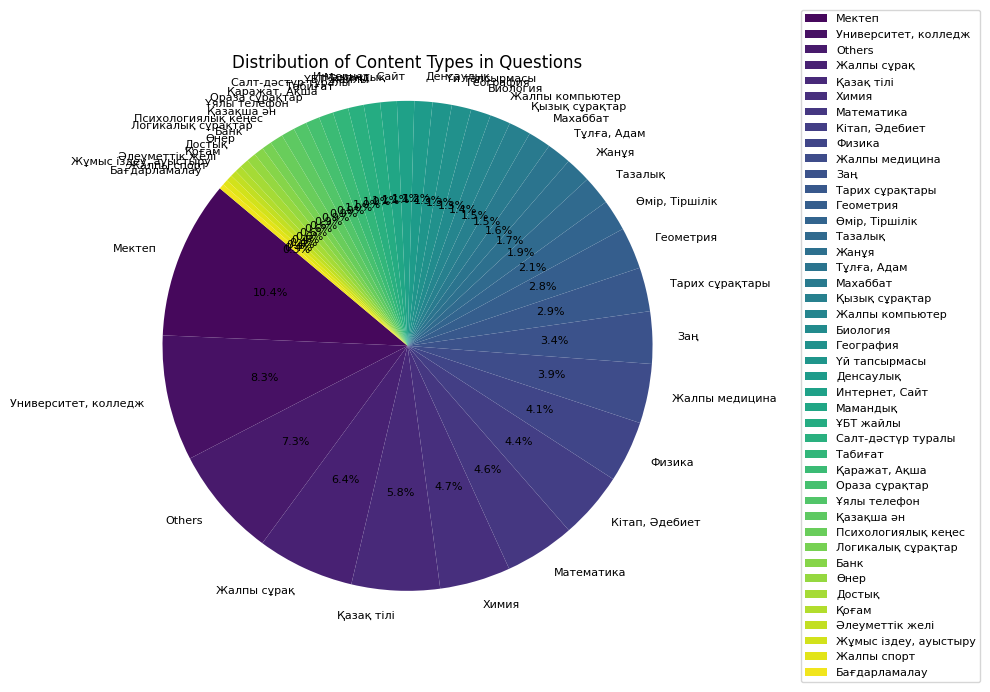

In [12]:
threshold = 60  # Categories with fewer occurrences than this will be grouped into 'Others'
small_categories = content_type_counts[content_type_counts < threshold].index
train_df['question_tag'] = train_df['question_tag'].apply(lambda x: 'Others' if x in small_categories else x)

# Recount the occurrences after grouping smaller categories
content_type_counts = train_df['question_tag'].value_counts()

# Display the counts
content_type_counts

# Pie Chart of Content Types
plt.figure(figsize=(10, 7))
plt.pie(content_type_counts, labels=content_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(content_type_counts)), textprops={'fontsize': 8})
plt.title('Distribution of Content Types in Questions')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(content_type_counts.index, loc="center left", bbox_to_anchor=(1, 0.5), fontsize=8)
plt.show()

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [14]:
df_clustering = train_df.copy()
label_encoder = LabelEncoder()
df_clustering['question_tag_encoded'] = label_encoder.fit_transform(df_clustering['question_tag'])
df_clustering.head()

question_title  \
0                 –ñ–∞“õ—Å—ã –µ–º—Ö–∞–Ω–∞–Ω—ã “õ–∞–ª–∞–π —Ç–∞“£–¥–∞—É –∫–µ—Ä–µ–∫?   
1            –®–∏–µ —Ç–æ–±—ã–Ω–∞ –∫“Ø–∑–≥—ñ –±–∞–ª“ì–∞ —Ç–∞–Ω—ã—Å—Ç—ã—Ä—É “õ–∞–∂–µ—Ç?   
2  "–ú–∏–Ω–µ—Ä–∞–ª–¥–∞—Ä–¥—ã“£ –∞–¥–∞–º ”©–º—ñ—Ä—ñ–Ω–¥–µ–≥—ñ –º–∞“£—ã–∑—ã" —ç—Å—Å–µ –º–∞...   
3  "–ú–∏–Ω–µ—Ä–∞–ª–¥–∞—Ä–¥—ã“£ –∞–¥–∞–º ”©–º—ñ—Ä—ñ–Ω–¥–µ–≥—ñ –º–∞“£—ã–∑—ã" —ç—Å—Å–µ –º–∞...   
4  "–ú–∏–Ω–µ—Ä–∞–ª–¥–∞—Ä–¥—ã“£ –∞–¥–∞–º ”©–º—ñ—Ä—ñ–Ω–¥–µ–≥—ñ –º–∞“£—ã–∑—ã" —ç—Å—Å–µ –º–∞...   

                                    question_content question_date  \
0   –¢—ñ—Ä–∫–µ—É–≥–µ —Ç“±—Ä–∞—Ä–¥–∞ “õ–∞–Ω–¥–∞–π –µ–º—Ö–∞–Ω–∞–Ω—ã —Ç–∞“£–¥–∞“ì–∞–Ω –¥“±—Ä—ã—Å?    2018-10-17   
1  –®–∏–µ —Ç–æ–±—ã–Ω–∞ –∫“Ø–∑–≥—ñ –±–∞–ª“ì–∞ “õ—ã–∑ –±–µ–Ω –±–∞–ª–∞“ì–∞ —Ç–∞–Ω—ã—Å—Ç—ã—Ä...    2018-10-16   
2          –ú–∏–Ω–µ—Ä–∞–ª–¥–∞—Ä–¥—ã“£ –∞–¥–∞–º ”©–º—ñ—Ä—ñ–Ω–¥–µ–≥—ñ –º–∞“£—ã–∑—ã —ç—Å—Å–µ    2018-10-16   
3          –ú–∏–Ω–µ—Ä–∞–ª–¥–∞—Ä–¥—ã“£ –∞–¥–∞–º ”©–º—ñ—Ä—ñ–Ω–¥–µ–≥—ñ –º–∞“£—ã–∑—ã —ç—Å—Å–µ    2018-10-16   
4          –ú–∏–Ω–µ—Ä–∞–ª–¥–∞—Ä–¥—ã“£ –∞–¥–∞–º ”©–º—ñ—Ä—ñ–Ω–¥–µ–≥—ñ –º–∞“£—ã–∑—ã —ç—Å—Å–µ    2018-10-16   

     question_tag  question_views  question_upvotes  \
0  –ñ–∞–ª–ø—ã –º–µ–¥–∏—Ü–∏–Ω–∞             514                 0   
1          –ú–µ–∫—Ç–µ–ø            2600                 0   
2     –ñ–∞–ª–ø—ã —Å“±—Ä–∞“õ           19000                 0   
3     –ñ–∞–ª–ø—ã —Å“±—Ä–∞“õ           19000                 0   
4     –ñ–∞–ª–ø—ã —Å“±—Ä–∞“õ           19000                 0   

                                         answer_text answer_date  \
0  –ë“±–ª —Å“±—Ä–∞“õ“õ–∞ –∂–∞—É–∞–ø –±–µ—Ä—É ”©—Ç–µ “õ–∏—ã–Ω. –ë—ñ–∑–¥—ñ“£ –µ–ª–¥–µ –º...  2018-11-12   
1  –¢–∞–Ω—ã—Å—Ç—ã—Ä—É.\n\n–ö“±—Ç—Ç—ã –±–æ–ª—Å—ã–Ω –∫“Ø–∑–≥—ñ –±–∞–ª —Å–∞–ª—Ç–∞–Ω–∞—Ç—ã...  2018-11-08   
2  –ú–∞–≥–∞–Ω –º–∏–Ω–µ—Ä–∞–ª–¥–∞—Ä –∞–¥–∞–º ”©–º—ñ—Ä—ñ–Ω–¥–µ–≥—ñ –º–∞“£—ã–∑—ã —ç—Å—Å–µ –∫...  2019-10-17   
3  –ú–∏–Ω–µ—Ä–∞–ª–¥—ã–Ω –º–∞–Ω—ã–∑—ã –∑–æ—Ä –∞–¥–∞–º 70 –ü–∏–∑—ã –°—É–¥–∞–Ω —Ç—É—Ä–∞–¥...  2021-10-07   
4  –û—Ç–≤–µ—Ç:–ê–¥–∞–º –¥–µ–Ω–µ—Å—ñ–Ω–¥–µ –±–æ–ª–∞—Ç—ã–Ω —Ö–∏–º–∏—è–ª—ã“õ —ç–ª–µ–º–µ–Ω—Ç—Ç...  2021-10-10   

   answer_upvotes  question_tag_encoded  
0               0                     9  
1               0                    21  
2               0                    11  
3               0                    11  
4               0                    11

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


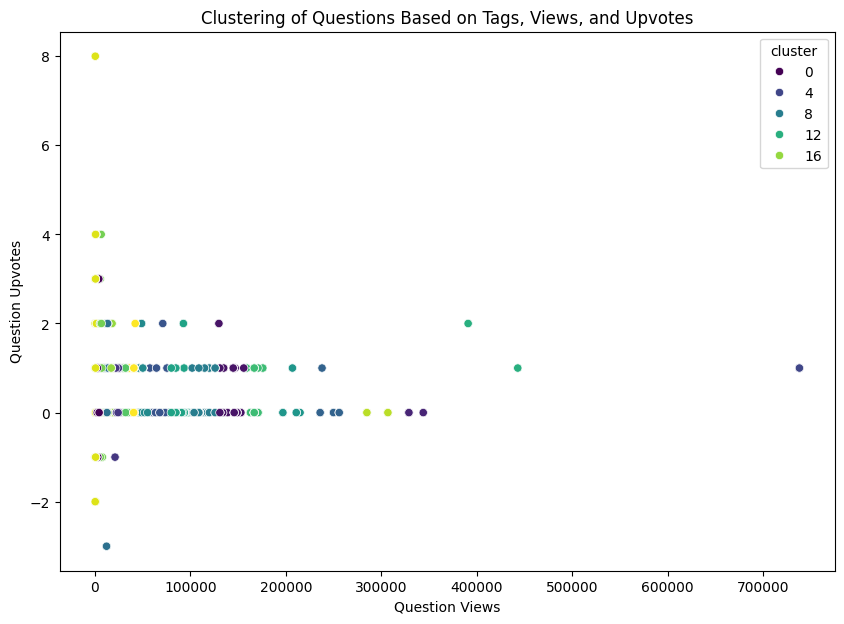

In [15]:
features = df_clustering[['question_tag_encoded', 'question_views', 'question_upvotes']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=20, random_state=0)  # Adjust the number of clusters (k) as needed
df_clustering['cluster'] = kmeans.fit_predict(features)

# Visualize clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='question_views', y='question_upvotes', hue='cluster', data=df_clustering, palette='viridis')
plt.title('Clustering of Questions Based on Tags, Views, and Upvotes')
plt.xlabel('Question Views')
plt.ylabel('Question Upvotes')
plt.show()

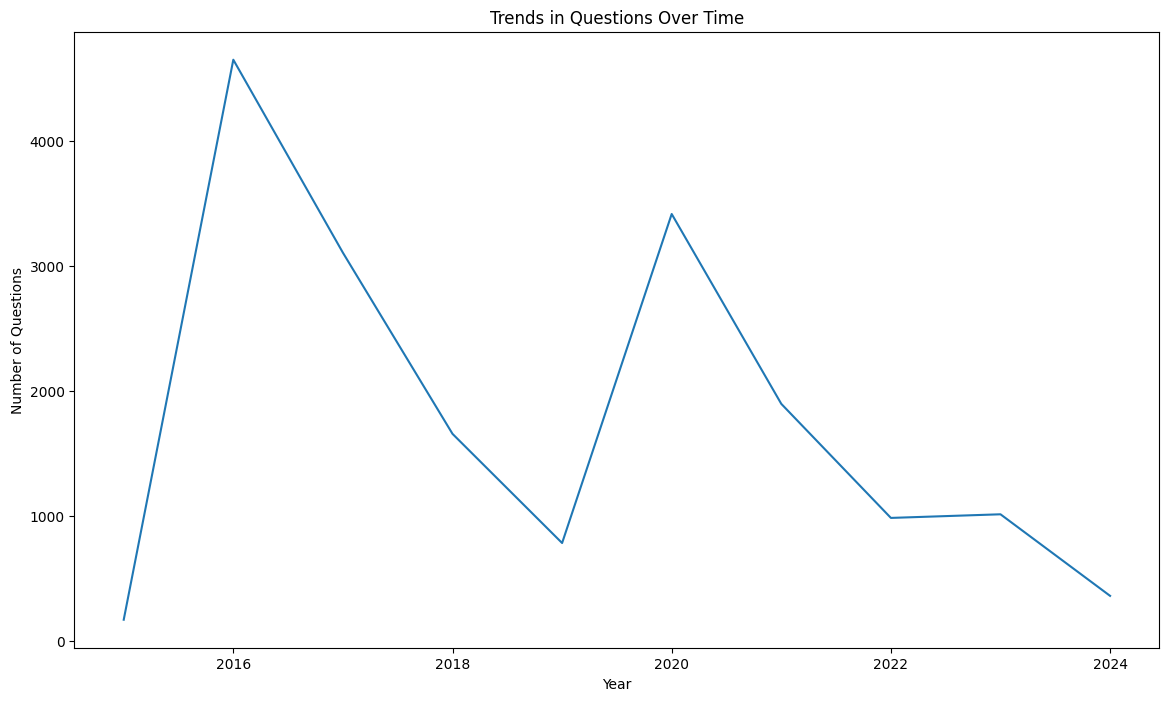

In [16]:
df_sorted = train_df.sort_values(by='question_date')

# Analyze trends over time
plt.figure(figsize=(14, 8))
df_sorted['year'] = df_sorted['question_date'].dt.year
question_count_by_year = df_sorted.groupby('year').size()
sns.lineplot(x=question_count_by_year.index, y=question_count_by_year.values)
plt.title('Trends in Questions Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Questions')
plt.show()

# **Creating test data set and applying NLP-techniques.**

In [17]:
# Get question with no answers as test df
no_answer_data = []
for file_name in files:
    with open(file_name, 'r', encoding='utf-8') as f:
        data = json.load(f)
        for entry in data:
            if 'answers' in entry and len(entry['answers']) == 0:
                question = {
                    'question_title': entry['question_title'],
                    'question_content': entry['question_content'],
                    'question_date': entry['question_date'],
                    'question_tag': entry['question_tag'],
                    'question_views': entry['question_views'],
                    'question_upvotes': entry['question_upvotes']
                }
                no_answer_data.append(question)

In [18]:
test_df = pd.DataFrame(no_answer_data)
test_df

question_title  \
0     –ï—Ä—Ç–µ“£—ñ–Ω–µ —Ç–∞–π—ã–º–∞ —ñ—à—ñ–º “õ–∞–∑–∞–Ω–¥–∞–π “õ–∞–π–Ω–∞–¥—ã. –û—Å—ã“ì–∞–Ω ...   
1      –ì–µ–æ–º–µ—Ç—Ä–∏—è –ø”ô–Ω—ñ–Ω–µ–Ω “Ø—à–±“±—Ä—ã—à—Ç—ã“£ –∞—É–¥–∞–Ω—ã–Ω —Ç–∞–±—É –∫–µ—Ä–µ–∫?   
2             –ê—Ñ—Ñ–µ—Ä–µ–Ω—Ç—Ç—ñ –∫”©—Ä—É –∂–æ–ª–¥–∞—Ä—ã–Ω—ã“£ –∞—É—ã—Å—É—ã –±–æ–ª–∞–¥—ã?   
3     "–û—Ä–∞–∑–∞–ª—ã –±–∞–π“ì–∞" –∂”ô–Ω–µ" –ë–∞–π–ª–∞—Ä“ì–∞" ”©–ª–µ“£—ñ–Ω–¥–µ–≥—ñ –±–∞–π...   
4                                   –ï—Ä–∫–µ–∫ –º“Ø—à–µ—Å—ñ –∞—É—Ä—É—ã?   
...                                                 ...   
3550  “ö–æ—Ä“ì–∞–Ω—ã—Å —ñ—Å—Ç–µ—Ä—ñ –∂”©–Ω—ñ–Ω–¥–µ–≥—ñ –±—ñ—Ä—ã“£“ì–∞–π –±–∞—Å“õ–∞—Ä—É “õ–∞–ª...   
3551                       –°—Ç–µ—Ä–æ–∏–¥ –∂–∞–π–ª—ã –∞“õ–ø–∞—Ä–∞—Ç –∫–µ—Ä–µ–∫?   
3552                    –ê—è“õ-“õ–æ–ª —ñ—Å—É—ñ–Ω–µ–Ω “õ–∞–ª–∞–π “õ“±—Ç—ã–ª–∞–º—ã–Ω   
3553          –ú—ã–Ω–∞–Ω–¥–∞–π –æ—Ç—à–∞—à—É–ª–∞—Ä “õ–∞–Ω—à–∞ —Ç“±—Ä–∞–¥—ã, –∂–æ–±–∞–º–µ–Ω?   
3554  –®–∞x—Ä —Ä—É–∫x –∫x–∞–Ω–Ω—ã–Ω –∂–∞“£–∞ –∫–∏–Ω–æ—Å—ã –∫–µ—Ä–µ–∫ –µ–¥—ñ “õ–∞–π–¥–∞–Ω...   

                                       question_content question_date  \
0     –ï—Ä—Ç–µ“£—ñ–Ω–µ —Ç–∞–π—ã–º–∞ —ñ—à—ñ–º “õ–∞–∑–∞–Ω–¥–∞–π “õ–∞–π–Ω–∞–¥—ã. –û—Å—ã“ì–∞–Ω ...    14.10.2018   
1     1. –î–∞–Ω—ã –≤–µ—Ä—à–∏–Ω—ã —Ç—Ä–µ—É–≥–æ–ª—å–Ω–∏–∫–∞ ABC\nA(4,8,3) B(2...    14.10.2018   
2     –ê—Ñ—Ñ–µ—Ä–µ–Ω—Ç—Ç—ñ –∫”©—Ä—É –∂–æ–ª–¥–∞—Ä—ã–Ω—ã“£ –∞—É—ã—Å—É—ã “õ–∞–π –∂–µ—Ä–¥–µ –æ—Ä...    13.10.2018   
3     –°—Ä–æ—á–Ω–æ –Ω—É–∂–Ω–æ,–ø–æ–∂–∞–ª—É–π—Å—Ç–∞\n\n“ö–∞—à–∞“ì–∞–Ω –ö“Ø—Ä–∂—ñ–º–∞–Ω“±–ª—ã–Ω—ã“£    10.10.2018   
4     –ú–µ–Ω –µ—Ä–∫–µ–∫–ø–∏–Ω –º—É—à–µ–º –µ–∫–∏ –±–µ—Ç–ø–µ–Ω –∂–∞—Ç—Å–∞ –∏–∞ –±–æ–ª–º–∞—Å–∞...    18.04.2020   
...                                                 ...           ...   
3550  “ö–æ—Ä“ì–∞–Ω—ã—Å —ñ—Å—Ç–µ—Ä—ñ –∂”©–Ω—ñ–Ω–¥–µ–≥—ñ –±—ñ—Ä—ã“£“ì–∞–π –±–∞—Å“õ–∞—Ä—É, “õ–∞...     7.05.2017   
3551  ”®—Ç–Ω–µ–º –Ω–∞“õ—Ç—ã –∞–π—Ç—ã“£—ã–∑–¥–∞—Ä—à—ã –º–µ–Ω—ñ“£ –¥–µ–Ω–µ–º–¥—ñ –∞–∑–¥–∞–ø –º...     7.05.2017   
3552  –°”ô–ª–µ–º–µ—Ç—Å—ñ–∑–¥–µ—Ä –º–µ ?–ú–µ–Ω—ñ“£ –∞—è“õ-“õ–æ–ª—ã–º —ñ—Å–∏ –±–µ—Ä–µ–¥—ñ –Ω...    31.12.2015   
3553                                  –∂–∞“£–∞ –∂—ã–ª–¥–∞—Ä—ã“£–º–µ–Ω!    30.12.2015   
3554  –®–∞x—Ä —Ä—É–∫x –∫x–∞–Ω–Ω—ã–Ω –∂–∞“£–∞ –∫–∏–Ω–æ—Å—ã –∫–µ—Ä–µ–∫ –µ–¥—ñ “õ–∞–π–¥–∞–Ω...    30.12.2015   

              question_tag  question_views  question_upvotes  
0            “Æ–π —Ç–∞–ø—Å—ã—Ä–º–∞—Å—ã             804                 0  
1                –ì–µ–æ–º–µ—Ç—Ä–∏—è             605                 0  
2     –£–Ω–∏–≤–µ—Ä—Å–∏—Ç–µ—Ç, –∫–æ–ª–ª–µ–¥–∂             467                 0  
3            “Æ–π —Ç–∞–ø—Å—ã—Ä–º–∞—Å—ã             931                 0  
4           –ñ–∞–ª–ø—ã –º–µ–¥–∏—Ü–∏–Ω–∞             425                 0  
...                    ...             ...               ...  
3550                   –ó–∞“£             321                 0  
3551               –¢–∞–∑–∞–ª—ã“õ             950                 0  
3552             –î–µ–Ω—Å–∞—É–ª—ã“õ            2200                 0  
3553           –ñ–∞–ª–ø—ã —Å“±—Ä–∞“õ             401                 0  
3554                  –ö–∏–Ω–æ             254                 0  

[3555 rows x 6 columns]

In [19]:
# Save it
test_df.to_csv('test.csv', index=False)

# **NLP-techniques for clustering**

Here, I use cosine similarity, TF-IDF normalizer for mapping similar questions from train dataset (where answer text is provided) and test dataset (answers are not provided).

In [20]:
# Trying kazNLP for cleaning normalizing, tokenizing the texts.
!git clone https://github.com/nlacslab/kaznlp.git
%cd kaznlp
!python tutorial.py


fatal: destination path 'kaznlp' already exists and is not an empty directory.
/content/kaznlp

('“ö–∞–π—ã—Ä–ª—ã —Ç–∞“£! ”ò–Ω—à—ñ –±–∞–ª–∞–∞–∞–ø–∞–Ω ‚ò∫Ô∏è‚ò∫Ô∏è‚ò∫Ô∏è L O V E  üá∞üáø', {'cleaned': 3, 'l2c': 2, 'c2l': 0})
('“ö–∞–π—ã—Ä–ª—ã —Ç–∞“£! ”ò–Ω—à—ñ –±–∞–ª–∞–ø–∞–Ω ‚ò∫Ô∏è‚ò∫Ô∏è‚ò∫Ô∏è LOVE üá∞üáø', {'cleaned': 3, 'l2c': 2, 'c2l': 0})
('–ö–∞—ã—ã—Ä–ª—ã —Ç–∞–Ω! –ê–Ω—à—ã –±–∞–ª–∞–∞–∞–ø–∞–Ω <emj>smilingface</emj><emj>smilingface</emj><emj>smilingface</emj> –õ –û –í –ï  <emj>Kazakhstan</emj>', {'cleaned': 3, 'l2c': 2, 'c2l': 0})
–ö–∞—ã—ã—Ä–ª—ã —Ç–∞–Ω! –ê–Ω—à—ã –±–∞–ª–∞–ø–∞–Ω <emj>smilingface</emj><emj>smilingface</emj><emj>smilingface</emj> –õ–û–í–ï <emj>Kazakhstan</emj>

[['–ö”©—à', '–∂“Ø—Ä–µ', '—Ç“Ø–∑–µ–ª–µ–¥—ñ', '.', '–ê“õ—Å–∞“õ', '“õ–æ–π', '—Ç“Ø—Å—Ç–µ–Ω', '–∫–µ–π—ñ–Ω', '–º–∞“£—ã—Ä–∞–π–¥—ã', '.']]
[['–ö”©—à', '–∂“Ø—Ä–µ', '—Ç“Ø–∑–µ–ª–µ–¥—ñ', '.'], ['–ê“õ—Å–∞“õ', '“õ–æ–π', '—Ç“Ø—Å—Ç–µ–Ω', '–∫–µ–π—ñ–Ω', '–º–∞“£—ã—Ä–∞–π–¥—ã', '.']]

Document "–ï“£–±–µ–∫ –µ—Ç—Å–µ“£ –µ—Ä—ñ–Ω–±–µ–π, —Ç–æ

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from kaznlp.normalization.ininorm import Normalizer
from kaznlp.tokenization.tokrex import TokenizeRex

In [22]:
normalizer = Normalizer()
tokenizer = TokenizeRex()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [24]:
kazakh_stop_words = [
    "–∂”ô–Ω–µ", "–¥–∞", "–¥–µ", "–º–µ–Ω", "—Ç–∞", "—Ç–µ", "–±–æ–ª", "–±—ñ—Ä–∞“õ", "–æ—Å—ã",
    "–±–∞—Ä–ª—ã“õ", "“õ–∞–Ω–¥–∞–π", "–Ω–µ–≥–µ", "–Ω–µ", "–∫—ñ–º", "“õ–∞—à–∞–Ω", "“õ–∞–π–¥–∞", "“õ–∞–Ω—à–∞",
    "“õ–∞–π", "–æ–ª", "–º–µ–Ω—ñ“£", "—Å–µ–Ω—ñ“£", "–æ–Ω—ã“£", "–±—ñ–∑–¥—ñ“£", "—Å—ñ–∑–¥—ñ“£", "–æ–ª–∞—Ä–¥—ã“£",
    "–º—ã–Ω–∞", "—Å–æ–ª", "—Å–æ–Ω—à–∞", "—Ç–µ–∫", "”ô—Ä", "”ô—Ä—ñ", "–±—ñ—Ä–Ω–µ—à–µ", "–∫–µ–π–±—ñ—Ä",
    "“ì–∞–Ω–∞", "–º“±–Ω–¥–∞", "–∞–Ω–∞—É", "–º—ñ–Ω–µ", "—Ç–∞“ì—ã"
]

In [25]:
# Feature engineering
train_df['text'] = train_df['question_title'] + " " + train_df['question_content']
test_df['text'] = test_df['question_title'] + " " + test_df['question_content']

In [26]:
def preprocess_text(text):
    # Normalize text
    norm_text, _ = normalizer.normalize(text)
    # Tokenize text
    tokens = tokenizer.tokenize(norm_text)
    # Flatten list of token lists
    tokens = [token for sublist in tokens for token in sublist]
    return ' '.join(tokens)

In [27]:
train_df['processed_text'] = train_df['text'].apply(preprocess_text)
test_df['processed_text'] = test_df['text'].apply(preprocess_text)

In [28]:
# Creating a vectorizer with kazakh stop words
tfidf_vectorizer = TfidfVectorizer(stop_words=kazakh_stop_words, max_features=1000)

In [29]:
# Transform train data
tfidf_matrix_train = tfidf_vectorizer.fit_transform(train_df['processed_text'])
# Transform test data
tfidf_matrix_test = tfidf_vectorizer.transform(test_df['processed_text'])

In [30]:
cosine_similarities = cosine_similarity(tfidf_matrix_test, tfidf_matrix_train)

In [31]:
top_n = 3  # Number of top similar questions to retrieve
results = []  # List to store similar questions

In [33]:
for i, row in enumerate(cosine_similarities):
    similar_indices = row.argsort()[-top_n:][::-1]
    for j, score in enumerate(similar_indices):
        result = {
            "original_question": test_df.iloc[i]['text'],
            "similar_question": train_df.iloc[score]['text'],
            "answer": train_df.iloc[score]['answer_text'],
            "similarity_score": row[score]
        }
        results.append(result)

# Create a DataFrame from the results
results_df = pd.DataFrame(results)

original_question  \
0   –ï—Ä—Ç–µ“£—ñ–Ω–µ —Ç–∞–π—ã–º–∞ —ñ—à—ñ–º “õ–∞–∑–∞–Ω–¥–∞–π “õ–∞–π–Ω–∞–¥—ã. –û—Å—ã“ì–∞–Ω ...   
1   –ï—Ä—Ç–µ“£—ñ–Ω–µ —Ç–∞–π—ã–º–∞ —ñ—à—ñ–º “õ–∞–∑–∞–Ω–¥–∞–π “õ–∞–π–Ω–∞–¥—ã. –û—Å—ã“ì–∞–Ω ...   
2   –ï—Ä—Ç–µ“£—ñ–Ω–µ —Ç–∞–π—ã–º–∞ —ñ—à—ñ–º “õ–∞–∑–∞–Ω–¥–∞–π “õ–∞–π–Ω–∞–¥—ã. –û—Å—ã“ì–∞–Ω ...   
3   –ì–µ–æ–º–µ—Ç—Ä–∏—è –ø”ô–Ω—ñ–Ω–µ–Ω “Ø—à–±“±—Ä—ã—à—Ç—ã“£ –∞—É–¥–∞–Ω—ã–Ω —Ç–∞–±—É –∫–µ—Ä–µ...   
4   –ì–µ–æ–º–µ—Ç—Ä–∏—è –ø”ô–Ω—ñ–Ω–µ–Ω “Ø—à–±“±—Ä—ã—à—Ç—ã“£ –∞—É–¥–∞–Ω—ã–Ω —Ç–∞–±—É –∫–µ—Ä–µ...   
..                                                ...   
95  –ê“õ—Ç–∞—É “õ–∞–ª–∞—Å—ã–Ω–¥–∞“ì—ã –ú–µ—Ä–∏–¥–∏–∞–Ω –∞—Ç—Ç—ã –∫–æ–ª–ª–µ–¥–∂–µ –æ“õ—ã–ø ...   
96  "–¢—Ä–∞–Ω—Å–ø–æ—Ä—Ç–Ω–æ–µ —Å—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ" –º–∞–º–∞–Ω–¥—ã“ì—ã —Ç—É—Ä–∞–ª—ã ...   
97  "–¢—Ä–∞–Ω—Å–ø–æ—Ä—Ç–Ω–æ–µ —Å—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ" –º–∞–º–∞–Ω–¥—ã“ì—ã —Ç—É—Ä–∞–ª—ã ...   
98  "–¢—Ä–∞–Ω—Å–ø–æ—Ä—Ç–Ω–æ–µ —Å—Ç—Ä–æ–∏—Ç–µ–ª—å—Å—Ç–≤–æ" –º–∞–º–∞–Ω–¥—ã“ì—ã —Ç—É—Ä–∞–ª—ã ...   
99  “ö–∞–∑–∞“õ—Å—Ç–∞–Ω–¥–∞ –Ω–µ–≥–µ Google Play –ú—É–∑—ã–∫–∞ –∂–∞–∑—ã–ª—É“ì–∞ “õ...   

                                     similar_question  \
0   –ú–æ—Ä—Ñ–æ–ª–æ–≥–∏—è–ª—ã“õ —Ç–∞–ª–¥–∞—É –∂–∞—Å–∞: –¢–∞—Ä–∏—Ö—à—ã–ª–∞—Ä–¥—ã“£, “ì“±–Ω–¥...   
1   –ú–æ—Ä—Ñ–æ–ª–æ–≥–∏—è–ª—ã“õ —Ç–∞–ª–¥–∞—É –∂–∞—Å–∞: –¢–∞—Ä–∏—Ö—à—ã–ª–∞—Ä–¥—ã“£, “ì“±–Ω–¥...   
2   ”ò–ª–¥–µ–Ω—ñ–ø, –∞—É–ª–∞–¥—ã“õ, –∂–µ–≥–µ–Ω–¥–µ—Ä—ñ —Å”©–∑–¥–µ—Ä—ñ–Ω–µ –º–æ—Ä—Ñ–æ–ª–æ–≥...   
3   “Æ—à–±“±—Ä—ã—à—Ç—ã“£ –∞—É–¥–∞–Ω—ã–Ω —Ç–∞–±—É. “Æ—à–±“±—Ä—ã—à—Ç—ã“£ –µ–∫—ñ “õ–∞–±—ã—Ä“ì...   
4   “Æ—à–±“±—Ä—ã—à—Ç—ã“£ –∞—É–¥–∞–Ω—ã–Ω —Ç–∞–±—ã“£–¥–∞—Ä? –¢—ñ–∫ –±“±—Ä—ã—à—Ç—ã “Ø—à–±“±—Ä...   
..                                                ...   
95  –û—Å—ã–Ω—ã“£ –æ—Ä–∏–≥–∏–Ω–∞–ª docx —Ñ–æ—Ä–º–∞—Ç—ã –±–∞—Ä–º–∞ —Ñ–æ—Ä–º—É–ª–∞–ª–∞—Ä ...   
96  –Æ—Ä–∏—Å—Ç –º–∞–º–∞–Ω–¥—ã“ì—ã–Ω –±—ñ—Ç—ñ—Ä—ñ–ø,“õ–∞–π –∂–µ—Ä–≥–µ –∂“±–º—ã—Å“õ–∞ –∫—ñ—Ä...   
97  –í–µ—Ç - —Å–∞–π—Ç–∞—Ä –º–∞–º–∞–Ω–¥—ã“ì—ã –±–æ–π—ã–Ω—à–∞ “õ–∞–Ω–¥–∞–π –∂“±–º—ã—Å“õ–∞ ...   
98  “ö–∞—Ä–∂—ã –º–µ–Ω–µ–¥–∂–º–µ–Ω—Ç —Ç—É—Ä–∞–ª—ã –Ω–µ –±—ñ–ª–µ—Å—ñ–∑–¥–µ—Ä? “ö–∞—Ä–∂—ã –º...   
99  ‚Äú–ñ–æ“£“ì–∞—Ä “õ–∞“õ–ø–∞—Å—ã‚Äù –º–∞“£—ã–Ω–¥–∞ –∂–æ“£“ì–∞—Ä–ª–∞—Ä–¥—ã –±—ñ—Ä–∂–æ–ª–∞—Ç–∞...   

                                               answer  similarity_score  
0   –¢–∞—Ä–∏—Ö-—Ç“Ø–±—ñ—Ä —Å”©–∑, -—à—ã- –∑–∞—Ç –µ—Å—ñ–º–Ω–µ–Ω –∑–∞—Ç –µ—Å—ñ–º —Ç—É–¥...          1.000000  
1       –æ–Ω—Å–µ–≥–∏–∑–∏–Ω—à–∏ —Å–æ–∑–∏–Ω–µ –º–æ—Ä—Ñ–æ–ª–æ–≥–∏—è–ª—ã–∫ —Ç–∞–ª–¥–∞—É –∫–µ—Ä–µ–∫          1.000000  
2   ”ò–ª–¥–µ–Ω—ñ–ø\n\n”ò–ª-—Ç“Ø–±—ñ—Ä, –∑–∞—Ç –µ—Å—ñ–º,\n\n-–¥–µ–Ω-–∑–∞—Ç –µ—Å—ñ...          1.000000  
3   S=0,5*6*8*Sin120¬∞=24*Sin(90¬∞+30¬∞)=24*Cos30¬∞=24...          0.652296  
4   –¢—ñ–∫ –±“±—Ä—ã—à—Ç—ã “Ø—à–±“±—Ä—ã—à—Ç—ã“£ –±—ñ—Ä –∫–∞—Ç–µ—Ç—ñ 10 , –∞–ª –æ–Ω—ã“£...          0.605982  
..                                                ...               ...  
95                                 word.docx (0,2 MB)          0.530878  
96  “ö–∞–∑—ñ—Ä–≥—ñ –∑–∞–º–∞–Ω –±—ñ–ª—ñ–º–¥—ñ–ª–µ—Ä –∑–∞–º–∞–Ω—ã, –µ–≥–µ—Ä –±—ñ–ª—ñ–º–¥—ñ ...          0.529557  
97  –°–µ–Ω–∏ –µ—à–∫–∏–º –µ—à–∫–∞—à–∞–Ω –∂“±–º–∏—Å“õ–∞ –∞–ª–º–∞–∏–¥))) —â—â—Å! –≤–µ—Ç ...          0.503831  
98  –ú–µ–Ω–µ–¥–∂–º–µ–Ω—Ç (–∞“ì—ã–ª—à—ã–Ω—à–∞ –ºanage ‚Äì –±–∞—Å“õ–∞—Ä—É, –º–µ“£–≥–µ—Ä...          0.494721  
99  1752 –∂—ã–ª—ã “õ–∞–∑–∞“õ —Å“±–ª—Ç–∞–Ω—ã –ê–±—ã–ª–∞–π –ñ–æ“£“ì–∞—Ä “õ–∞“õ–ø–∞—Å—ã ...          0.797023  

[100 rows x 4 columns]

In [37]:
results_df.head(10)

original_question  \
0  –ï—Ä—Ç–µ“£—ñ–Ω–µ —Ç–∞–π—ã–º–∞ —ñ—à—ñ–º “õ–∞–∑–∞–Ω–¥–∞–π “õ–∞–π–Ω–∞–¥—ã. –û—Å—ã“ì–∞–Ω ...   
1  –ï—Ä—Ç–µ“£—ñ–Ω–µ —Ç–∞–π—ã–º–∞ —ñ—à—ñ–º “õ–∞–∑–∞–Ω–¥–∞–π “õ–∞–π–Ω–∞–¥—ã. –û—Å—ã“ì–∞–Ω ...   
2  –ï—Ä—Ç–µ“£—ñ–Ω–µ —Ç–∞–π—ã–º–∞ —ñ—à—ñ–º “õ–∞–∑–∞–Ω–¥–∞–π “õ–∞–π–Ω–∞–¥—ã. –û—Å—ã“ì–∞–Ω ...   
3  –ì–µ–æ–º–µ—Ç—Ä–∏—è –ø”ô–Ω—ñ–Ω–µ–Ω “Ø—à–±“±—Ä—ã—à—Ç—ã“£ –∞—É–¥–∞–Ω—ã–Ω —Ç–∞–±—É –∫–µ—Ä–µ...   
4  –ì–µ–æ–º–µ—Ç—Ä–∏—è –ø”ô–Ω—ñ–Ω–µ–Ω “Ø—à–±“±—Ä—ã—à—Ç—ã“£ –∞—É–¥–∞–Ω—ã–Ω —Ç–∞–±—É –∫–µ—Ä–µ...   
5  –ì–µ–æ–º–µ—Ç—Ä–∏—è –ø”ô–Ω—ñ–Ω–µ–Ω “Ø—à–±“±—Ä—ã—à—Ç—ã“£ –∞—É–¥–∞–Ω—ã–Ω —Ç–∞–±—É –∫–µ—Ä–µ...   
6  –ê—Ñ—Ñ–µ—Ä–µ–Ω—Ç—Ç—ñ –∫”©—Ä—É –∂–æ–ª–¥–∞—Ä—ã–Ω—ã“£ –∞—É—ã—Å—É—ã –±–æ–ª–∞–¥—ã? –ê—Ñ—Ñ–µ...   
7  –ê—Ñ—Ñ–µ—Ä–µ–Ω—Ç—Ç—ñ –∫”©—Ä—É –∂–æ–ª–¥–∞—Ä—ã–Ω—ã“£ –∞—É—ã—Å—É—ã –±–æ–ª–∞–¥—ã? –ê—Ñ—Ñ–µ...   
8  –ê—Ñ—Ñ–µ—Ä–µ–Ω—Ç—Ç—ñ –∫”©—Ä—É –∂–æ–ª–¥–∞—Ä—ã–Ω—ã“£ –∞—É—ã—Å—É—ã –±–æ–ª–∞–¥—ã? –ê—Ñ—Ñ–µ...   
9  "–û—Ä–∞–∑–∞–ª—ã –±–∞–π“ì–∞" –∂”ô–Ω–µ" –ë–∞–π–ª–∞—Ä“ì–∞" ”©–ª–µ“£—ñ–Ω–¥–µ–≥—ñ –±–∞–π...   

                                    similar_question  \
0  –ú–æ—Ä—Ñ–æ–ª–æ–≥–∏—è–ª—ã“õ —Ç–∞–ª–¥–∞—É –∂–∞—Å–∞: –¢–∞—Ä–∏—Ö—à—ã–ª–∞—Ä–¥—ã“£, “ì“±–Ω–¥...   
1  –ú–æ—Ä—Ñ–æ–ª–æ–≥–∏—è–ª—ã“õ —Ç–∞–ª–¥–∞—É –∂–∞—Å–∞: –¢–∞—Ä–∏—Ö—à—ã–ª–∞—Ä–¥—ã“£, “ì“±–Ω–¥...   
2  ”ò–ª–¥–µ–Ω—ñ–ø, –∞—É–ª–∞–¥—ã“õ, –∂–µ–≥–µ–Ω–¥–µ—Ä—ñ —Å”©–∑–¥–µ—Ä—ñ–Ω–µ –º–æ—Ä—Ñ–æ–ª–æ–≥...   
3  “Æ—à–±“±—Ä—ã—à—Ç—ã“£ –∞—É–¥–∞–Ω—ã–Ω —Ç–∞–±—É. “Æ—à–±“±—Ä—ã—à—Ç—ã“£ –µ–∫—ñ “õ–∞–±—ã—Ä“ì...   
4  “Æ—à–±“±—Ä—ã—à—Ç—ã“£ –∞—É–¥–∞–Ω—ã–Ω —Ç–∞–±—ã“£–¥–∞—Ä? –¢—ñ–∫ –±“±—Ä—ã—à—Ç—ã “Ø—à–±“±—Ä...   
5  x-3y+6=0 —Ç“Ø–∑—É—ñ –∂”ô–Ω–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç–∞ –æ—Å—Ç–µ—Ä—ñ–Ω–µ–Ω “õ“±—Ä—ã–ª...   
6  –î–µ–Ω–µ —à—ã–Ω—ã“õ—Ç—ã—Ä—É –ø”ô–Ω—ñ–Ω–µ –æ“õ–∏—Ç—ã–Ω —Å—Ç—É–¥–µ–Ω—Ç–∫–µ –º—ñ–Ω–µ–∑–¥–µ...   
7  ”ò—Ä—Ç“Ø—Ä–ª—ñ –ø—Ä–æ—Ñ–∏–ª–¥–µ–≥—ñ —Å–∞—É—ã“õ—Ç—ã—Ä—É –ª–∞–≥–µ—Ä–ª–µ—Ä—ñ–Ω–¥–µ –¥–µ–Ω–µ...   
8  –î–µ–Ω–µ —à—ã–Ω—ã“õ—Ç—ã—Ä—É –º“±“ì–∞–ª—ñ–º—ñ–Ω–µ –º—ñ–Ω–µ–∑–¥–µ–º–µ –∫–µ—Ä–µ–∫ –î–µ–Ω–µ...   
9  “ö–∞–∑—ñ—Ä–≥—ñ –∞“õ—ã–Ω–¥–∞—Ä –∞–π—Ç—ã—Å—ã–Ω–¥–∞“ì—ã –∫”©—Ç–µ—Ä—ñ–ª–≥–µ–Ω –º”ô—Å–µ–ª–µ ...   

                                              answer  similarity_score  
0  –¢–∞—Ä–∏—Ö-—Ç“Ø–±—ñ—Ä —Å”©–∑, -—à—ã- –∑–∞—Ç –µ—Å—ñ–º–Ω–µ–Ω –∑–∞—Ç –µ—Å—ñ–º —Ç—É–¥...          1.000000  
1      –æ–Ω—Å–µ–≥–∏–∑–∏–Ω—à–∏ —Å–æ–∑–∏–Ω–µ –º–æ—Ä—Ñ–æ–ª–æ–≥–∏—è–ª—ã–∫ —Ç–∞–ª–¥–∞—É –∫–µ—Ä–µ–∫          1.000000  
2  ”ò–ª–¥–µ–Ω—ñ–ø\n\n”ò–ª-—Ç“Ø–±—ñ—Ä, –∑–∞—Ç –µ—Å—ñ–º,\n\n-–¥–µ–Ω-–∑–∞—Ç –µ—Å—ñ...          1.000000  
3  S=0,5*6*8*Sin120¬∞=24*Sin(90¬∞+30¬∞)=24*Cos30¬∞=24...          0.652296  
4  –¢—ñ–∫ –±“±—Ä—ã—à—Ç—ã “Ø—à–±“±—Ä—ã—à—Ç—ã“£ –±—ñ—Ä –∫–∞—Ç–µ—Ç—ñ 10 , –∞–ª –æ–Ω—ã“£...          0.605982  
5  –¢“Ø–∑—É –∂”ô–Ω–µ –∫–æ–æ—Ä–¥–∏–Ω–∞—Ç –æ—Å—å—Ç–µ—Ä—ñ –∞—Ä“õ—ã–ª—ã “õ“±—Ä—ã–ª“ì–∞–Ω “Ø—à...          0.564926  
6  –ú–Ü–ù–ï–ó–î–ï–ú–ï (—Å—Ç—É–¥–µ–Ω—Ç–∫–µ –º—ñ–Ω–µ–∑–¥–µ–º–µ)\n   (—Å—Ç—É–¥–µ–Ω—Ç—Ç—ñ...          0.596183  
7  ”ò—Ä —Ç“Ø—Ä–ª—ñ –ø—Ä–æ—Ñ–∏–ª—å–¥–µ–≥—ñ —Å–∞—É—ã“õ—Ç—ã—Ä—É –ª–∞–≥–µ—Ä–ª–µ—Ä—ñ–Ω–¥–µ–≥—ñ ...          0.596183  
8  –î–µ–Ω–µ —à—ã–Ω—ã“õ—Ç—ã—Ä—É –ø”ô–Ω—ñ–Ω—ñ“£ –º“±“ì–∞–ª—ñ–º—ñ (–∞—Ç—ã-–∂”©–Ω—ñ)\n–ú—ñ...          0.582482  
9  “ö–∞–∑–∞“õ ”ô–¥–µ–±–∏–µ—Ç—ñ —Ç–∞—Ä–∏—Ö—ã–Ω—ã“£ ”©–∑–µ–∫—Ç—ñ –∞—Ä–Ω–∞—Å—ã ‚Äî –¥”ô—Å—Ç“Ø...          0.921306

In [39]:
results_df.to_csv('clustering_results.csv', index=False)

In [34]:
# Trying BERT tokenizer here I could not perform it in colab due to RAM restrictions
#!pip install transformers torch

In [35]:
from transformers import BertModel, BertTokenizer
import torch

In [36]:
#tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
#model = BertModel.from_pretrained('bert-base-multilingual-cased')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [37]:
#def get_bert_embeddings(text_list):
    #inputs = tokenizer(text_list, return_tensors='pt', padding=True, truncation=True, max_length=512)
    #with torch.no_grad():
        #outputs = model(**inputs)
    #embeddings = outputs.last_hidden_state.mean(dim=1)
    #return embeddings

In [ ]:
# Generate BERT embeddings
#train_embeddings = get_bert_embeddings(train_df['text'].tolist())
#test_embeddings = get_bert_embeddings(test_df['text'].tolist())

In [ ]:
#cosine_similarities = cosine_similarity(test_embeddings, train_embeddings)

In [ ]:
# Retrieve similar questions
#top_n = 3  # Number of top similar questions to retrieve
#results_bert = []

#for i, row in enumerate(cosine_similarities):
    #similar_indices = row.argsort()[-top_n:][::-1]
    #for j, score in enumerate(similar_indices):
        #result = {
            #"original_question": test_df.iloc[i]['text'],
            #"similar_question": train_df.iloc[score]['text'],
            #"answer": train_df.iloc[score]['answer_text'],
            #"similarity_score": row[score]
        #}
        #results_bert.append(result)

# Create a DataFrame from the results
#results_bert_df = pd.DataFrame(results_bert)

# Display the DataFrame
#results_bert_df.head(10)